In [562]:
import pandas as pd
import fuzzywuzzy

In [563]:
url = 'https://datosabiertos.enacom.gob.ar/rest/datastreams/277615/data.csv'
df_con_al_serv_de_inter = pd.read_csv(url, encoding='UTF-8', sep=',', quotechar='"', decimal=',', )


In [564]:
df_con_al_serv_de_inter['Latitud'] = df_con_al_serv_de_inter['Latitud'].str.strip('"')
df_con_al_serv_de_inter['Longitud'] = df_con_al_serv_de_inter['Longitud'].str.strip('"')


In [565]:
df_con_al_serv_de_inter

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,CHACO,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,CHACO,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,CHACO,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020.0,"-27,8868655966917","-59,2791003619491"


In [566]:
df_prov = pd.read_csv('../CSV_Cleaned/df_provincias.csv')

In [567]:
df_prov = df_prov['provincia']

In [568]:
df_prov

0            Buenos Aires
1         Capital Federal
2               Catamarca
3                   Chaco
4                  Chubut
5              Corrientes
6                 Córdoba
7              Entre Ríos
8                 Formosa
9                   Jujuy
10               La Pampa
11               La Rioja
12                Mendoza
13               Misiones
14                Neuquén
15              Río Negro
16                  Salta
17               San Juan
18               San Luis
19             Santa Cruz
20               Santa Fe
21    Santiago Del Estero
22       Tierra Del Fuego
23                Tucumán
Name: provincia, dtype: object

In [569]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Create a function to find the closest matching province
def find_closest_match(province):
    matches = process.extractOne(province, df_prov)
    return matches[0]

# Apply the function to create the 'prov2' column
df_con_al_serv_de_inter['provincia'] = df_con_al_serv_de_inter['Provincia'].apply(find_closest_match)



In [570]:
df_con_al_serv_de_inter.head(5)

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,provincia
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024",Buenos Aires
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179",Buenos Aires
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248",Buenos Aires
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442",Buenos Aires
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423",Buenos Aires


In [571]:
# Obtener las columnas del DataFrame
columns = df_con_al_serv_de_inter.columns.tolist()

# Mover la columna "provincia" a la primera posición
columns.remove('provincia')
columns.insert(0, 'provincia')

# Reordenar el DataFrame con las nuevas posiciones de las columnas
df_con_al_serv_de_inter = df_con_al_serv_de_inter[columns]

# Imprimir el DataFrame resultante
df_con_al_serv_de_inter

# Eliminar la columna 'Provincia'
df_con_al_serv_de_inter = df_con_al_serv_de_inter.drop('Provincia', axis=1)

In [572]:
df_con_al_serv_de_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [573]:
df_con_al_serv_de_inter.drop_duplicates().head()

,provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos Aires,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,Buenos Aires,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,Buenos Aires,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,Buenos Aires,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,Buenos Aires,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [574]:
# Reemplazar '--' por 'NO' en el DataFrame
df_con_al_serv_de_inter = df_con_al_serv_de_inter.replace({'--': 'No'})
df_con_al_serv_de_inter = df_con_al_serv_de_inter.replace({'SI': 'Si'})

In [575]:
df_con_al_serv_de_inter

,provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos Aires,Bahía Blanca,Villa Bordeau,0,No,No,No,No,No,No,No,Si,Si,6056020.0,"-38,6472605094596","-62,3200223419024"
1,Buenos Aires,Bahía Blanca,Villa Espora,0,No,No,No,No,No,No,No,No,No,6056020.0,"-38,7765069529222","-62,1851833537179"
2,Buenos Aires,Balcarce,Balcarce,38376,Si,Si,Si,Si,No,Si,Si,Si,Si,6063010.0,"-37,8482779294345","-58,2551665841248"
3,Buenos Aires,Balcarce,Los Pinos,337,No,No,No,No,No,Si,Si,No,No,6063020.0,"-37,9412057603","-58,3225920150442"
4,Buenos Aires,Balcarce,Napaleofú,374,No,No,No,Si,No,Si,Si,Si,Si,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,Chaco,Quitilipi,Quitilipi,24517,Si,No,No,Si,No,Si,Si,Si,Si,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,Chaco,Quitilipi,Villa El Palmar,879,No,No,No,No,No,Si,No,No,Si,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,Chaco,San Fernando,Barranqueras,54698,Si,Si,No,Si,No,Si,Si,Si,Si,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,Chaco,San Fernando,Basail,1929,Si,Si,No,No,Si,Si,Si,Si,Si,22140020.0,"-27,8868655966917","-59,2791003619491"


In [576]:
df_con_al_serv_de_inter.isnull().sum()

provincia         0
Partido           0
Localidad         0
Poblacion         0
ADSL              0
CABLEMODEM        0
DIALUP            0
FIBRAOPTICA       0
SATELITAL         0
WIRELESS          0
TELEFONIAFIJA     0
3G                0
4G                0
link             12
Latitud           0
Longitud          0
dtype: int64

In [577]:
# Reemplazar los valores nulos en la columna "link" por 0
df_con_al_serv_de_inter['link'] = df_con_al_serv_de_inter['link'].fillna(0)

In [578]:
df_con_al_serv_de_inter.isnull().sum()

provincia        0
Partido          0
Localidad        0
Poblacion        0
ADSL             0
CABLEMODEM       0
DIALUP           0
FIBRAOPTICA      0
SATELITAL        0
WIRELESS         0
TELEFONIAFIJA    0
3G               0
4G               0
link             0
Latitud          0
Longitud         0
dtype: int64

In [579]:
df_con_al_serv_de_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4312 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [580]:
df_con_al_serv_de_inter['link'] = df_con_al_serv_de_inter['link'].astype('Int64')

In [581]:
df_con_al_serv_de_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   Poblacion      4312 non-null   int64 
 4   ADSL           4312 non-null   object
 5   CABLEMODEM     4312 non-null   object
 6   DIALUP         4312 non-null   object
 7   FIBRAOPTICA    4312 non-null   object
 8   SATELITAL      4312 non-null   object
 9   WIRELESS       4312 non-null   object
 10  TELEFONIAFIJA  4312 non-null   object
 11  3G             4312 non-null   object
 12  4G             4312 non-null   object
 13  link           4312 non-null   Int64 
 14  Latitud        4312 non-null   object
 15  Longitud       4312 non-null   object
dtypes: Int64(1), int64(1), object(14)
memory usage: 543.3+ KB


In [582]:
df_con_al_serv_de_inter['Latitud'] = df_con_al_serv_de_inter['Latitud'].str.replace(',', '.')
df_con_al_serv_de_inter['Longitud'] = df_con_al_serv_de_inter['Longitud'].str.replace(',', '.')


In [583]:
df_con_al_serv_de_inter.describe(include='all')

,provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
count,4312,4312,4312,4.312000e+03,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312.0,4312,4312
unique,23,444,3912,NaN,2,2,2,2,2,2,2,2,2,<NA>,4260,4259
top,Buenos Aires,General Roca,San Pedro,NaN,No,No,No,No,No,Si,Si,No,Si,<NA>,-28.5555816291232,-67.1592836516078
freq,901,85,12,NaN,3179,3436,3909,2866,3233,2242,2162,2432,2574,<NA>,4,4
mean,NaN,NaN,NaN,8.693093e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38989913.931586,NaN,NaN
std,NaN,NaN,NaN,3.821544e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29424304.935893,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,NaN,NaN,NaN,1.160000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10084087.5,NaN,NaN
50%,NaN,NaN,NaN,5.755000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34007008.5,NaN,NaN
75%,NaN,NaN,NaN,3.202000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66120775.0,NaN,NaN


In [584]:
df_con_al_serv_de_inter

,provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos Aires,Bahía Blanca,Villa Bordeau,0,No,No,No,No,No,No,No,Si,Si,6056020,-38.6472605094596,-62.3200223419024
1,Buenos Aires,Bahía Blanca,Villa Espora,0,No,No,No,No,No,No,No,No,No,6056020,-38.7765069529222,-62.1851833537179
2,Buenos Aires,Balcarce,Balcarce,38376,Si,Si,Si,Si,No,Si,Si,Si,Si,6063010,-37.8482779294345,-58.2551665841248
3,Buenos Aires,Balcarce,Los Pinos,337,No,No,No,No,No,Si,Si,No,No,6063020,-37.9412057603,-58.3225920150442
4,Buenos Aires,Balcarce,Napaleofú,374,No,No,No,Si,No,Si,Si,Si,Si,6063030,-37.6254980210026,-58.7461862359423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,Chaco,Quitilipi,Quitilipi,24517,Si,No,No,Si,No,Si,Si,Si,Si,22133010,-26.8732071732978,-60.2185241226399
4308,Chaco,Quitilipi,Villa El Palmar,879,No,No,No,No,No,Si,No,No,Si,22133020,-26.4551186226266,-60.1646165913523
4309,Chaco,San Fernando,Barranqueras,54698,Si,Si,No,Si,No,Si,Si,Si,Si,22140010,-27.4877739289761,-58.9327416886365
4310,Chaco,San Fernando,Basail,1929,Si,Si,No,No,Si,Si,Si,Si,Si,22140020,-27.8868655966917,-59.2791003619491


In [585]:
df_con_al_serv_de_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   Poblacion      4312 non-null   int64 
 4   ADSL           4312 non-null   object
 5   CABLEMODEM     4312 non-null   object
 6   DIALUP         4312 non-null   object
 7   FIBRAOPTICA    4312 non-null   object
 8   SATELITAL      4312 non-null   object
 9   WIRELESS       4312 non-null   object
 10  TELEFONIAFIJA  4312 non-null   object
 11  3G             4312 non-null   object
 12  4G             4312 non-null   object
 13  link           4312 non-null   Int64 
 14  Latitud        4312 non-null   object
 15  Longitud       4312 non-null   object
dtypes: Int64(1), int64(1), object(14)
memory usage: 543.3+ KB


In [586]:
df_con_al_serv_de_inter['Latitud'] = pd.to_numeric(df_con_al_serv_de_inter['Latitud'], errors='coerce')
df_con_al_serv_de_inter['Longitud'] = pd.to_numeric(df_con_al_serv_de_inter['Longitud'], errors='coerce')


In [587]:
df_con_al_serv_de_inter = df_con_al_serv_de_inter.rename(columns=str.lower)

In [588]:
df_con_al_serv_de_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provincia      4312 non-null   object 
 1   partido        4312 non-null   object 
 2   localidad      4312 non-null   object 
 3   poblacion      4312 non-null   int64  
 4   adsl           4312 non-null   object 
 5   cablemodem     4312 non-null   object 
 6   dialup         4312 non-null   object 
 7   fibraoptica    4312 non-null   object 
 8   satelital      4312 non-null   object 
 9   wireless       4312 non-null   object 
 10  telefoniafija  4312 non-null   object 
 11  3g             4312 non-null   object 
 12  4g             4312 non-null   object 
 13  link           4312 non-null   Int64  
 14  latitud        4308 non-null   float64
 15  longitud       4310 non-null   float64
dtypes: Int64(1), float64(2), int64(1), object(12)
memory usage: 543.3+ KB


In [589]:
import seaborn as sns

C:\Users\Luca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Luca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


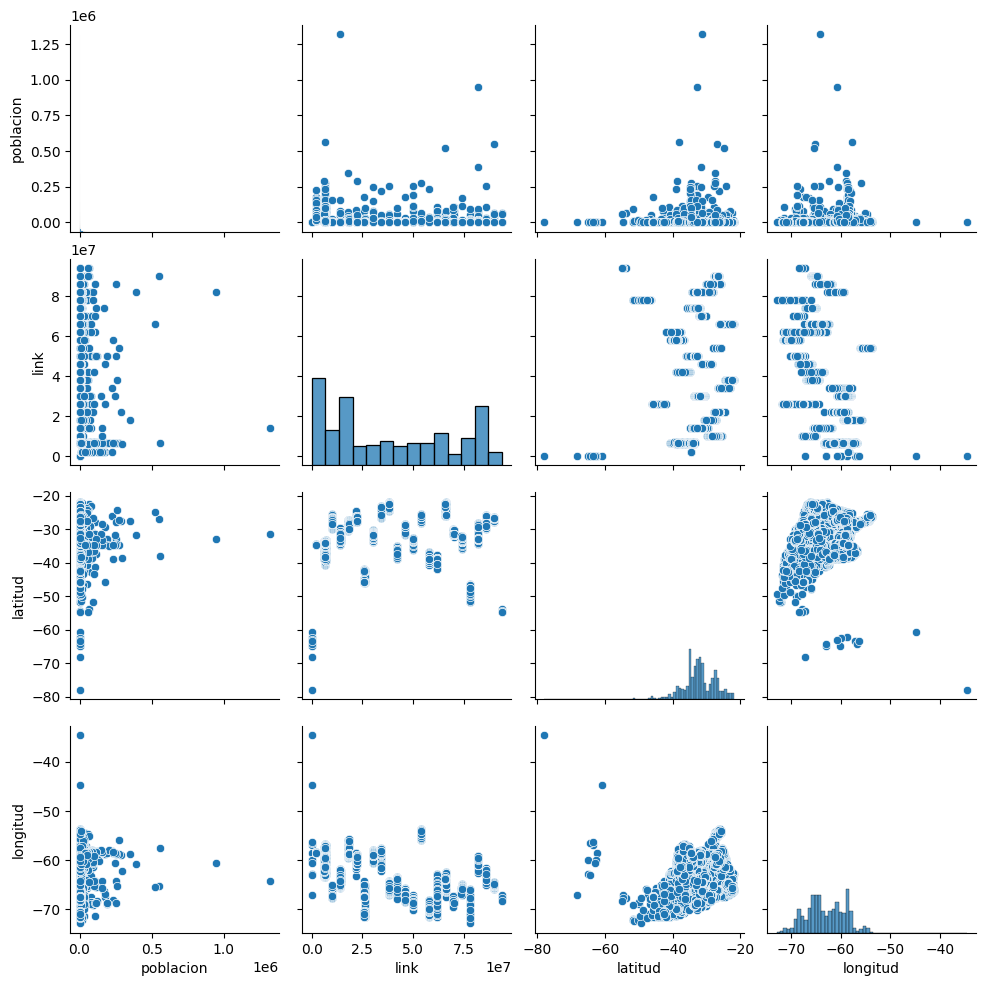

In [590]:
sns.pairplot(df_con_al_serv_de_inter)

In [591]:
print(df_con_al_serv_de_inter['provincia'].unique())

['Buenos Aires' 'Chubut' 'Misiones' 'Catamarca' 'Chaco' 'Córdoba'
 'Entre Ríos' 'Río Negro' 'Jujuy' 'Formosa' 'La Pampa' 'Mendoza' 'Salta'
 'Neuquén' 'San Juan' 'San Luis' 'Santa Fe' 'Santiago Del Estero'
 'Tucumán' 'Tierra Del Fuego' 'Santa Cruz' 'La Rioja' 'Corrientes']


# Guardo

In [592]:
df_con_al_serv_de_inter.to_csv('../CSV_Cleaned/conect_al_serv_de_inter_x_prov_y_loc.csv', index=False, mode='w')